In [34]:
#
# COSC2671 Social Media and Network Analytics
# @author Aidan Cowie, 2019
#

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
import sys
import json
from collections import Counter
from wordcloud import WordCloud
import codecs
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from colorama import Fore, Back, Style
from urllib.parse import urlparse
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
from os import listdir

In [35]:
# Get list of json files in directory
files_in_drive = listdir()
json_files = []
for ix, file in enumerate(files_in_drive):
    if('.json' in file):
        json_files.append(file)
   
# Remove files if wanted
rm = []
# rm.append(['linux', 'ipython', 'spark', 'node']) # cosc
# rm.append(['django', 'keras', 'tensorflow', 'pandas', 'scikit-learn']) # Python
# rm.append(['ggplot2', 'tidyverse']) # R
for layer in rm:
    for f in layer:
        json_files.remove(f+".json")
json_files

['django.json',
 'ggplot2.json',
 'ipython.json',
 'keras.json',
 'linux.json',
 'node.json',
 'pandas.json',
 'scikit-learn.json',
 'spark.json',
 'tensorflow.json',
 'tidyverse.json']

In [36]:
# Prepare keys for dictionary
file_names = []
for file in json_files:
    start = file.find('.')
    file_names.append(file[0:start])

In [37]:
# Put all json data into dictionary
data = {}
for ix, file in enumerate(json_files):
    tmp = json.loads(open(file, encoding="utf-8").read())
    data[file_names[ix]] = tmp['data']['repository']['ref']['target']['history']['edges']

In [38]:
df= pd.DataFrame(columns=['Repo',
                          'Message Headline', 
                          'Message',
                          'Date'])
for repo in data:
    ix = 0
    while ix < len(data[repo]):
        try:
#             print(data[repo][ix]['node']['messageHeadline'])
            df = df.append({'Repo': repo,
                            'Message Headline': data[repo][ix]['node']['messageHeadline'], 
                            'Message': data[repo][ix]['node']['message'], 
                            'Date': data[repo][ix]['node']['author']['date']} , ignore_index=True)
        except:
            pass
        ix += 1

In [39]:
df['Date'] = pd.DatetimeIndex(pd.to_datetime(df['Date'], utc=True))
# .dt.strftime('%Y-%m-%d %H:%M:%S')
df.head()

,Repo,Message Headline,Message,Date
0,django,Removed some outdated backwards compatibility ...,Removed some outdated backwards compatibility ...,2019-07-18 06:13:01+00:00
1,django,Refs #27910 -- Doc'd support for enumeration t...,Refs #27910 -- Doc'd support for enumeration t...,2019-09-24 11:03:40+00:00
2,django,Refs #30350 -- Doc'd support for range seriali...,Refs #30350 -- Doc'd support for range seriali...,2019-09-24 10:58:04+00:00
3,django,Updated the default cache key transformation i...,Updated the default cache key transformation i...,2019-09-24 10:42:43+00:00
4,django,Refs #29444 -- Removed redundant DatabaseFeatu...,Refs #29444 -- Removed redundant DatabaseFeatu...,2019-09-24 08:32:26+00:00


In [40]:
df['Message'][0]

'Removed some outdated backwards compatibility imports and misleading comments.\n\nEmptyResultSet moved in 46509cf13dbf049f75077981c29ef2c60b5a96ab.\nFieldDoesNotExist moved in 8958170755b37ce346ae5257c1000bd936faa3b0.\nBoundField and pretty_name moved in 8550161e531a603d57723850fb09c4c9b7ca60b9.\nEMPTY_VALUES moved in 471596fc1afcb9c6258d317c619eaf5fd394e797.\nBaseRunserverCommand moved in 5c53e30607014163872e89c221b206992a9acfef.'

c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


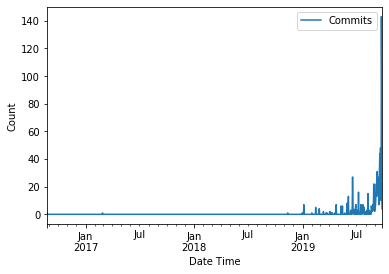

In [8]:
# Creating a time series for the amount of tweets per hour
time_count = pd.DataFrame(columns=['datetime'])
time_count['datetime'] = df['Date']
time_count_resize = time_count.resample('d', on='datetime').count()
ax = time_count_resize.plot()
ax.set_xlabel("Date Time")
ax.set_ylabel("Count")
ax.legend(["Commits"])

In [9]:
for repo in data:
    print(repo)

django
ggplot2
ipython
keras
linux
node
pandas
scikit-learn
spark
tensorflow
tidyverse


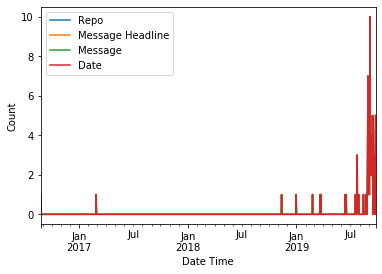

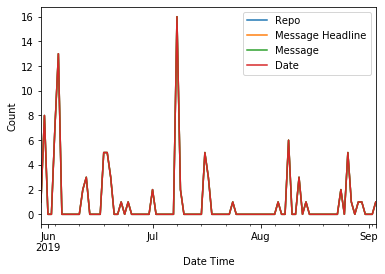

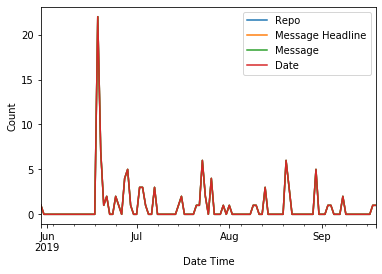

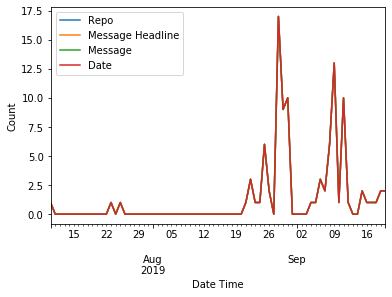

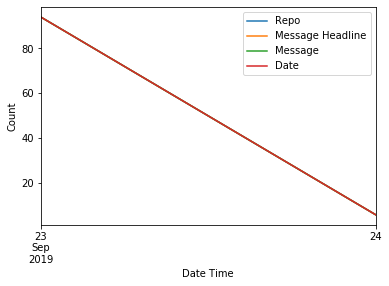

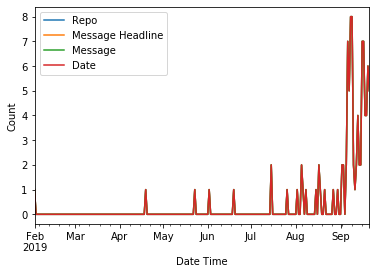

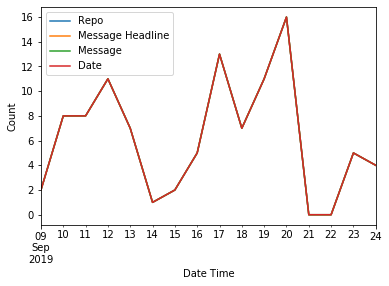

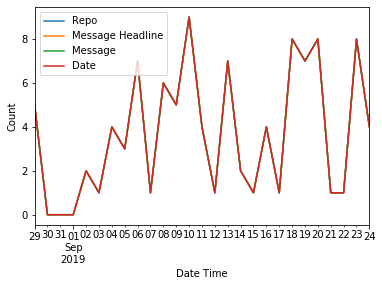

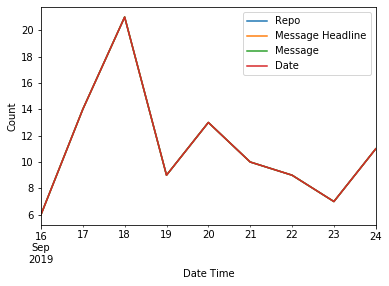

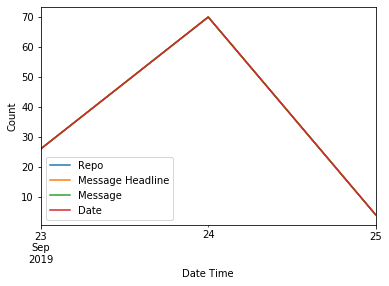

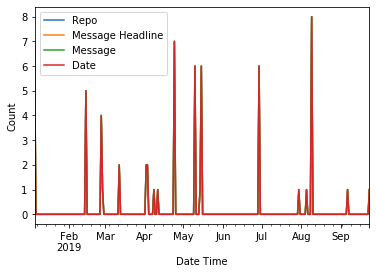

In [10]:
#burst technieque ?
topic0 = df['Repo']=='django'
dftopic0 = df[topic0]
topic1 = df['Repo']=='ggplot2'
dftopic1 = df[topic1]
topic2 = df['Repo']=='ipython'
dftopic2 = df[topic2]
topic3 = df['Repo']=='keras'
dftopic3 = df[topic3]
topic4 = df['Repo']=='linux'
dftopic4 = df[topic4]
topic5 = df['Repo']=='node'
dftopic5 = df[topic5]
topic6 = df['Repo']=='pandas'
dftopic6 = df[topic6]
topic7 = df['Repo']=='scikit-learn'
dftopic7 = df[topic7]
topic8 = df['Repo']=='spark'
dftopic8 = df[topic8]
topic9 = df['Repo']=='tensorflow'
dftopic9 = df[topic9]
topic10 = df['Repo']=='tidyverse'
dftopic10 = df[topic10]



resize_dftopic0 = dftopic0.resample('d', on='Date').count()
resize_dftopic1 = dftopic1.resample('d', on='Date').count()
resize_dftopic2 = dftopic2.resample('d', on='Date').count()
resize_dftopic3 = dftopic3.resample('d', on='Date').count()
resize_dftopic4 = dftopic4.resample('d', on='Date').count()
resize_dftopic5 = dftopic5.resample('d', on='Date').count()
resize_dftopic6 = dftopic6.resample('d', on='Date').count()
resize_dftopic7 = dftopic7.resample('d', on='Date').count()
resize_dftopic8 = dftopic8.resample('d', on='Date').count()
resize_dftopic9 = dftopic9.resample('d', on='Date').count()
resize_dftopic10 = dftopic10.resample('d', on='Date').count()



ax = resize_dftopic0.plot()
ax.set_xlabel("Date Time")
ax.set_ylabel("Count")

az =resize_dftopic1.plot()
az.set_xlabel("Date Time")
az.set_ylabel("Count")

aw = resize_dftopic2.plot()
aw.set_xlabel("Date Time")
aw.set_ylabel("Count")

ay =resize_dftopic3.plot()
ay.set_xlabel("Date Time")
ay.set_ylabel("Count")

av =resize_dftopic4.plot()
av.set_xlabel("Date Time")
av.set_ylabel("Count")

ax = resize_dftopic5.plot()
ax.set_xlabel("Date Time")
ax.set_ylabel("Count")

az =resize_dftopic6.plot()
az.set_xlabel("Date Time")
az.set_ylabel("Count")

aw = resize_dftopic7.plot()
aw.set_xlabel("Date Time")
aw.set_ylabel("Count")

ay =resize_dftopic8.plot()
ay.set_xlabel("Date Time")
ay.set_ylabel("Count")

av =resize_dftopic9.plot()
av.set_xlabel("Date Time")
av.set_ylabel("Count")

av =resize_dftopic10.plot()
av.set_xlabel("Date Time")
av.set_ylabel("Count")

plt.show()

In [11]:
dftopic7

,Repo,Message Headline,Message,Date
700,scikit-learn,FIX Negative or null sample_weights in SVM (#1...,FIX Negative or null sample_weights in SVM (#1...,2019-09-24 23:21:00+00:00
701,scikit-learn,STY Fix the position of 'More testimonials' li...,STY Fix the position of 'More testimonials' li...,2019-09-24 14:48:03+00:00
702,scikit-learn,[MRG] DOC solve rendering set_params in Voting...,[MRG] DOC solve rendering set_params in Voting...,2019-09-24 13:55:13+00:00
703,scikit-learn,FIX array dtype mismatch in isotonic regressio...,FIX array dtype mismatch in isotonic regressio...,2019-09-24 12:44:09+00:00
704,scikit-learn,FEA Add Categorical Naive Bayes (#12569),FEA Add Categorical Naive Bayes (#12569),2019-09-23 21:38:22+00:00
...,...,...,...,...
795,scikit-learn,DOC improve the PDP example (#14842),DOC improve the PDP example (#14842),2019-08-29 15:56:03+00:00
796,scikit-learn,Fix for spectral clustering error when using '...,Fix for spectral clustering error when using '...,2019-08-29 12:16:37+00:00
797,scikit-learn,MAINT: Remove redundant code in MLP (#14815),MAINT: Remove redundant code in MLP (#14815),2019-08-29 11:52:45+00:00
798,scikit-learn,[MAINT] Post #14647 cleanups (#14840),[MAINT] Post #14647 cleanups (#14840),2019-08-29 09:59:03+00:00


In [12]:
df['Message'] = df['Message'].replace(regex=['_'], value=' ')
df['Message'] = df['Message'].replace(regex=['-'], value=' ')

In [13]:
def preprocess(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [14]:
df

,Repo,Message Headline,Message,Date
0,django,Removed some outdated backwards compatibility ...,Removed some outdated backwards compatibility ...,2019-07-18 06:13:01+00:00
1,django,Refs #27910 -- Doc'd support for enumeration t...,Refs #27910 Doc'd support for enumeration t...,2019-09-24 11:03:40+00:00
2,django,Refs #30350 -- Doc'd support for range seriali...,Refs #30350 Doc'd support for range seriali...,2019-09-24 10:58:04+00:00
3,django,Updated the default cache key transformation i...,Updated the default cache key transformation i...,2019-09-24 10:42:43+00:00
4,django,Refs #29444 -- Removed redundant DatabaseFeatu...,Refs #29444 Removed redundant DatabaseFeatu...,2019-09-24 08:32:26+00:00
...,...,...,...,...
1058,tidyverse,use_pkgdown_travis(),use pkgdown travis(),2019-01-05 15:08:51+00:00
1059,tidyverse,Remove built website,Remove built website,2019-01-05 15:07:31+00:00
1060,tidyverse,use_tidy_ci(),use tidy ci(),2019-01-05 14:19:12+00:00
1061,tidyverse,use_tidy_description(),use tidy description(),2019-01-05 14:18:10+00:00


In [15]:
df['Message'] = df['Message'].apply(lambda x: preprocess(x))
df['Message'].head()

0    Removed some outdated backwards compatibility ...
1    Refs 27910    Docd support for enumeration typ...
2    Refs 30350    Docd support for range serializa...
3    Updated the default cache key transformation i...
4    Refs 29444    Removed redundant DatabaseFeatur...
Name: Message, dtype: object

In [16]:
tokenizer = RegexpTokenizer(r'\w+')
df['Message'] = df['Message'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['Message'].head(20)

0     [removed, some, outdated, backwards, compatibi...
1     [refs, 27910, docd, support, for, enumeration,...
2     [refs, 30350, docd, support, for, range, seria...
3     [updated, the, default, cache, key, transforma...
4     [refs, 29444, removed, redundant, databasefeat...
5     [fixed, 29444, allowed, returning, multiple, f...
6     [refs, 26601, used, new, style, middlewares, i...
7     [fixed, 30796, prevented, select, related, fro...
8     [fixed, 30732, docd, that, samesite, cookies, ...
9     [fixed, 13296, fixed, ordering, by, optionsord...
10    [fixed, 29915, added, support, for, values, wi...
11    [refs, 29915, docd, limitation, of, using, pat...
12    [refs, 29915, added, tests, for, using, patter...
13                [fixed, typo, in, docsrefsettingstxt]
14    [dropped, obsolete, mimetype, kwarg, in, csrf,...
15    [refs, 28622, clarified, security, implication...
16    [fixed, 28622, allowed, specifying, password, ...
17    [fixed, 30771, fixed, exact, lookup, again

In [17]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [18]:
df['Message'] = df['Message'].apply(lambda x: remove_stopwords(x))
df['Message'].head(20)

0     [removed, outdated, backwards, compatibility, ...
1     [refs, 27910, docd, support, enumeration, type...
2     [refs, 30350, docd, support, range, serializat...
3     [updated, default, cache, key, transformation,...
4     [refs, 29444, removed, redundant, databasefeat...
5     [fixed, 29444, allowed, returning, multiple, f...
6     [refs, 26601, used, new, style, middlewares, d...
7     [fixed, 30796, prevented, select, related, mut...
8     [fixed, 30732, docd, samesite, cookies, flags,...
9     [fixed, 13296, fixed, ordering, optionsorder, ...
10    [fixed, 29915, added, support, values, hyphens...
11    [refs, 29915, docd, limitation, using, pattern...
12    [refs, 29915, added, tests, using, pattern, lo...
13                    [fixed, typo, docsrefsettingstxt]
14    [dropped, obsolete, mimetype, kwarg, csrf, tes...
15    [refs, 28622, clarified, security, implication...
16    [fixed, 28622, allowed, specifying, password, ...
17    [fixed, 30771, fixed, exact, lookup, queri

In [19]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
#     lem_text = [lemmatizer.lemmatize(i) for i in text]
    lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [20]:
# nltk.download('wordnet')

df['Message'].apply(lambda x: word_lemmatizer(x))

0       removed outdated backwards compatibility impor...
1       ref 27910 docd support enumeration type serial...
2       ref 30350 docd support range serialization mig...
3       updated default cache key transformation docum...
4       ref 29444 removed redundant databasefeaturesca...
                              ...                        
1058                                   use pkgdown travis
1059                                 remove built website
1060                                          use tidy ci
1061                                 use tidy description
1062                                      update roxygen2
Name: Message, Length: 1063, dtype: object

In [21]:
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text= [stemmer.stem(i) for i in text]
    return stem_text

In [22]:
df['Message'].apply(lambda x: word_stemmer(x))

0       [remov, outdat, backward, compat, import, misl...
1       [ref, 27910, docd, support, enumer, type, seri...
2       [ref, 30350, docd, support, rang, serial, migrat]
3       [updat, default, cach, key, transform, documen...
4       [ref, 29444, remov, redund, databasefeaturesca...
                              ...                        
1058                                [use, pkgdown, travi]
1059                               [remov, built, websit]
1060                                      [use, tidi, ci]
1061                                [use, tidi, descript]
1062                                    [updat, roxygen2]
Name: Message, Length: 1063, dtype: object

In [23]:
df['Message'] = df['Message'].apply(lambda x: word_lemmatizer(x))
df['Message'].head(20)

0     removed outdated backwards compatibility impor...
1     ref 27910 docd support enumeration type serial...
2     ref 30350 docd support range serialization mig...
3     updated default cache key transformation docum...
4     ref 29444 removed redundant databasefeaturesca...
5     fixed 29444 allowed returning multiple field i...
6     ref 26601 used new style middlewares documenta...
7     fixed 30796 prevented select related mutating ...
8     fixed 30732 docd samesite cooky flag affect xf...
9     fixed 13296 fixed ordering optionsorder respec...
10    fixed 29915 added support value hyphen pattern...
11    ref 29915 docd limitation using pattern lookup...
12    ref 29915 added test using pattern lookup valu...
13                        fixed typo docsrefsettingstxt
14       dropped obsolete mimetype kwarg csrf test view
15    ref 28622 clarified security implication passw...
16    fixed 28622 allowed specifying password reset ...
17    fixed 30771 fixed exact lookup query selec

In [25]:
# nltk.download('vader_lexicon')
sentAnalyser = SentimentIntensityAnalyzer()
sentiment = df['Message'].apply(lambda x: sentAnalyser.polarity_scores(x))
df = pd.concat([df,sentiment.apply(pd.Series)],1)
df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aidan\AppData\Roaming\nltk_data...


,Repo,Message Headline,Message,Date,neg,neu,pos,compound
0,django,Removed some outdated backwards compatibility ...,removed outdated backwards compatibility impor...,2019-07-18 06:13:01+00:00,0.145,0.675,0.180,0.2732
1,django,Refs #27910 -- Doc'd support for enumeration t...,ref 27910 docd support enumeration type serial...,2019-09-24 11:03:40+00:00,0.000,0.722,0.278,0.4019
2,django,Refs #30350 -- Doc'd support for range seriali...,ref 30350 docd support range serialization mig...,2019-09-24 10:58:04+00:00,0.000,0.690,0.310,0.4019
3,django,Updated the default cache key transformation i...,updated default cache key transformation docum...,2019-09-24 10:42:43+00:00,0.000,1.000,0.000,0.0000
4,django,Refs #29444 -- Removed redundant DatabaseFeatu...,ref 29444 removed redundant databasefeaturesca...,2019-09-24 08:32:26+00:00,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
1058,tidyverse,use_pkgdown_travis(),use pkgdown travis,2019-01-05 15:08:51+00:00,0.000,1.000,0.000,0.0000
1059,tidyverse,Remove built website,remove built website,2019-01-05 15:07:31+00:00,0.000,1.000,0.000,0.0000
1060,tidyverse,use_tidy_ci(),use tidy ci,2019-01-05 14:19:12+00:00,0.000,1.000,0.000,0.0000
1061,tidyverse,use_tidy_description(),use tidy description,2019-01-05 14:18:10+00:00,0.000,1.000,0.000,0.0000


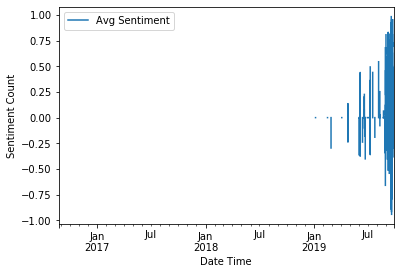

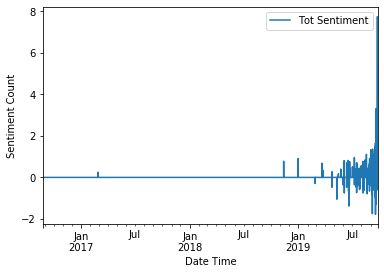

In [26]:
# resampling the datetime columns to hourly bins
sentiment_count = pd.DataFrame(columns=['datetime','sentiment'])
sentiment_count['datetime'] = df['Date']
sentiment_count['sentiment']= df['compound']
resize = sentiment_count.resample('H', on='datetime').mean()
newSeries = sentiment_count.resample('H', on='datetime').sum()

# Ploting the avg sentiment per hour
ax = resize.plot()
ax.set_xlabel("Date Time")
ax.set_ylabel("Sentiment Count")
ax.legend(["Avg Sentiment"])

# Ploting the total sentiment per hour
az =newSeries.plot()
az.set_xlabel("Date Time")
az.set_ylabel("Sentiment Count")
az.legend(["Tot Sentiment"])
plt.show()

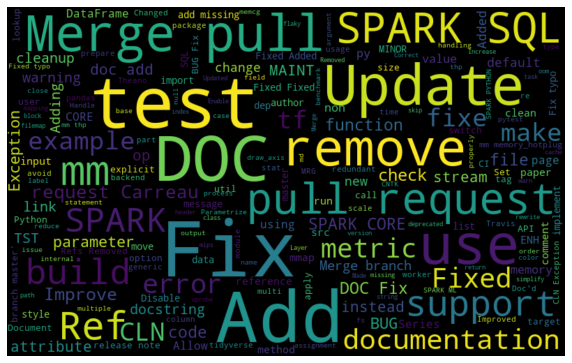

In [27]:
# Printing out the top 50 words in a word cloud
all_words = ' '.join([text for text in df['Message Headline']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

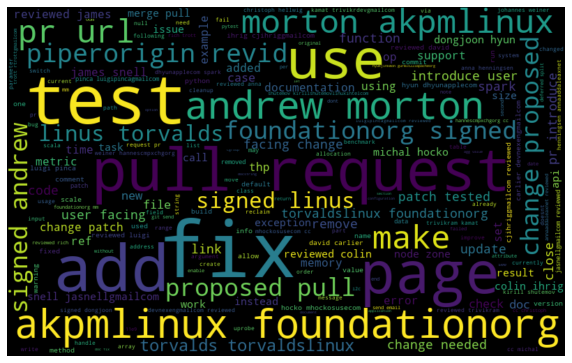

In [28]:
# Printing out the top 50 words in a word cloud
all_words = ' '.join([text for text in df['Message']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
# LDA Topic Analysis
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df['Message'].values.astype('U'))

# Fitting the LDA Method with 5 topics
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

# NMF Topic Analysis
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(df['Message'].values.astype('U'))

# Fitting the NMF Method with 5 topics
nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [30]:
# Printing the LDA Key Words For Each Topic
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 LDA words for topic {i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 LDA words for topic 0:
['close', 'authored', 'user', 'patch', 'test', 'pr', 'pull', 'request', 'spark', 'change']


Top 10 LDA words for topic 1:
['fixed', 'scale', 'doc', 'oom', 'piperorigin', 'revid', 'update', 'add', 'test', 'fix']


Top 10 LDA words for topic 2:
['ihrig', 'jasnellgmailcom', 'snell', 'james', 'doc', 'agg', 'fix', 'url', 'pr', 'reviewed']


Top 10 LDA words for topic 3:
['test', 'link', 'memcg', 'patch', 'foundationorg', 'split', 'thp', 'page', 'signed', 'cc']


Top 10 LDA words for topic 4:
['linus', 'morton', 'andrew', 'link', 'akpmlinux', 'memory', 'page', 'foundationorg', 'signed', 'cc']




In [31]:
# Printing the NMF Key Words For Each Topic
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words NMF for topic {i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words NMF for topic 0:
['carlier', 'colin', 'ihrig', 'cjihriggmailcom', 'james', 'jasnellgmailcom', 'snell', 'pr', 'url', 'reviewed']


Top 10 words NMF for topic 1:
['close', 'pr', 'authored', 'merge', 'spark', 'update', 'pull', 'test', 'request', 'change']


Top 10 words NMF for topic 2:
['torvalds', 'acked', 'link', 'morton', 'andrew', 'akpmlinux', 'page', 'foundationorg', 'signed', 'cc']


Top 10 words NMF for topic 3:
['pep8', 'link', 'documentation', 'add', 'bug', 'test', 'theano', 'typo', 'doc', 'fix']


Top 10 words NMF for topic 4:
['internal', 'ops', 'file', 'adding', 'rollback', 'test', 'automated', 'add', 'revid', 'piperorigin']




In [33]:
df['Message'][0]

'removed outdated backwards compatibility import misleading comment emptyresultset moved 46509cf13dbf049f75077981c29ef2c60b5a96ab fielddoesnotexist moved 8958170755b37ce346ae5257c1000bd936faa3b0 boundfield pretty name moved 8550161e531a603d57723850fb09c4c9b7ca60b9 empty value moved 471596fc1afcb9c6258d317c619eaf5fd394e797 baserunservercommand moved 5c53e30607014163872e89c221b206992a9acfef'